#### Purposes of this file:
- Use random sampling to select small subsets from the original dataset
- Preliminary analysis on our sample data

# 1. Random Sampling

In [1]:
import pandas as pd
import os
import random

In [2]:
# Download training_set_0 in the same file with this notebook
path = './training_set_0'

In [6]:
# Read all file names in training_set_0 and store them in a list
file_list = [file_name for file_name in os.listdir(path)]
file_list

['log_0_20180722_000000000000.csv',
 'log_0_20180821_000000000000.csv',
 'log_0_20180918_000000000000.csv',
 'log_0_20180907_000000000000.csv',
 'log_0_20180717_000000000000.csv',
 'log_0_20180729_000000000000.csv',
 'log_0_20180814_000000000000.csv',
 'log_0_20180913_000000000000.csv',
 'log_0_20180831_000000000000.csv',
 'log_0_20180908_000000000000.csv',
 'log_0_20180917_000000000000.csv',
 'log_0_20180810_000000000000.csv',
 'log_0_20180804_000000000000.csv',
 'log_0_20180903_000000000000.csv',
 'log_0_20180825_000000000000.csv',
 'log_0_20180726_000000000000.csv',
 'log_0_20180718_000000000000.csv',
 'log_0_20180906_000000000000.csv',
 'log_0_20180801_000000000000.csv',
 'log_0_20180820_000000000000.csv',
 'log_0_20180723_000000000000.csv',
 'log_0_20180815_000000000000.csv',
 'log_0_20180912_000000000000.csv',
 'log_0_20180716_000000000000.csv',
 'log_0_20180728_000000000000.csv',
 'log_0_20180916_000000000000.csv',
 'log_0_20180811_000000000000.csv',
 'log_0_20180830_00000000000

#### Put the randomly selected rows in each file together

In [96]:
df_all = pd.DataFrame()
session_id_all = []

In [99]:
df_all = pd.DataFrame()
session_id_all = []

# Put them in a for-loop to select 1% session ids for all files in the folder:
for file_name in file_list:
    df = pd.read_csv(path+'/'+file_name)
    session_list = df['session_id'].unique().tolist()
    session_select = random.sample(session_list, round(0.01*len(session_list)))
    session_id_all = session_id_all+session_select
    df_select = df[df['session_id'].isin(session_select)]
    df_all = df_all.append(df_select)
    print('---------------------')
    print('file name:', file_name)
    print('number of session ids:', len(session_select))
    print('length of data', df_select.shape)

---------------------
file name: log_0_20180722_000000000000.csv
number of session ids: 1722
length of data (28663, 21)
---------------------
file name: log_0_20180821_000000000000.csv
number of session ids: 1931
length of data (31673, 21)
---------------------
file name: log_0_20180918_000000000000.csv
number of session ids: 1922
length of data (31861, 21)
---------------------
file name: log_0_20180907_000000000000.csv
number of session ids: 2011
length of data (33332, 21)
---------------------
file name: log_0_20180717_000000000000.csv
number of session ids: 2032
length of data (33752, 21)
---------------------
file name: log_0_20180729_000000000000.csv
number of session ids: 1715
length of data (28608, 21)
---------------------
file name: log_0_20180814_000000000000.csv
number of session ids: 1884
length of data (31521, 21)
---------------------
file name: log_0_20180913_000000000000.csv
number of session ids: 1935
length of data (31951, 21)
---------------------
file name: log_0_2

In [100]:
len(session_id_all), df_all['session_id'].nunique()

(124952, 124952)

In [101]:
df_all.shape

(2073469, 21)

In [116]:
# store the dataset in a csv file
df_all.to_csv('Trainingset0_all.csv', index=False)

# 2. Initial Analysis

In [113]:
df_all.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
1504,7_002686e2-9045-4730-8ebe-e9a16532df00,1,11,t_675c2e70-4d23-4032-a720-f1acd9b03842,True,True,True,False,0,0,...,0,0,0,True,18,2018-07-21,True,user_collection,fwdbtn,fwdbtn
1505,7_002686e2-9045-4730-8ebe-e9a16532df00,2,11,t_f2a1ae43-3ec2-40fc-92d1-5d8173249eba,True,True,True,False,0,1,...,0,0,0,True,18,2018-07-21,True,user_collection,fwdbtn,fwdbtn
1506,7_002686e2-9045-4730-8ebe-e9a16532df00,3,11,t_991198c8-d264-4cad-b6ac-27e1259a09bb,True,True,True,False,0,1,...,0,0,0,True,18,2018-07-21,True,user_collection,fwdbtn,endplay
1507,7_002686e2-9045-4730-8ebe-e9a16532df00,4,11,t_dfdd754b-eb70-4761-a84b-922a4bc06bef,False,True,True,False,0,1,...,0,0,0,True,18,2018-07-21,True,user_collection,clickrow,fwdbtn
1508,7_002686e2-9045-4730-8ebe-e9a16532df00,5,11,t_0431bbbf-8522-4458-8abe-e08a4e63801a,False,False,False,True,0,1,...,0,0,0,True,18,2018-07-21,True,user_collection,fwdbtn,trackdone


In [114]:
# Columns of the dataset
df_all.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [115]:
df_all['session_id'].nunique()

124952

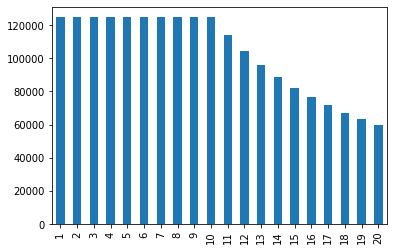

In [119]:
df_all['session_position'].value_counts().sort_index().plot.bar()

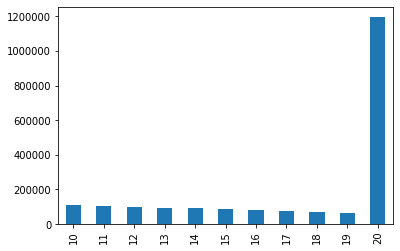

In [120]:
df_all['session_length'].value_counts().sort_index().plot.bar()

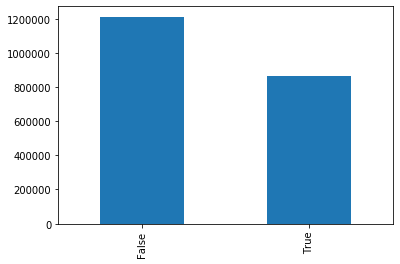

In [121]:
df_all['skip_1'].value_counts().sort_index().plot.bar()

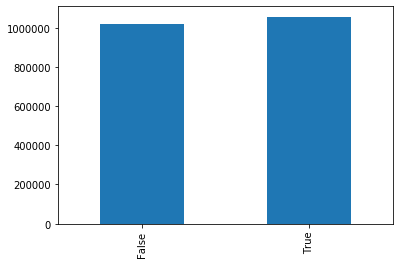

In [122]:
df_all['skip_2'].value_counts().sort_index().plot.bar()

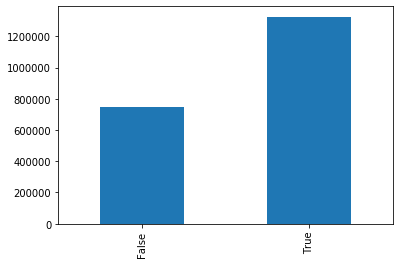

In [123]:
df_all['skip_3'].value_counts().sort_index().plot.bar()

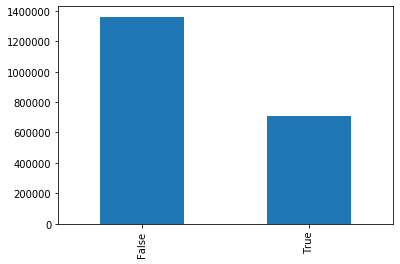

In [124]:
df_all['not_skipped'].value_counts().sort_index().plot.bar()

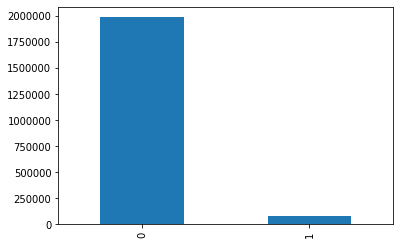

In [125]:
df_all['context_switch'].value_counts().sort_index().plot.bar()

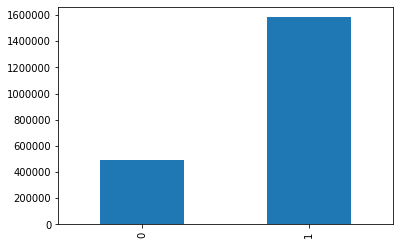

In [127]:
df_all['no_pause_before_play'].value_counts().sort_index().plot.bar()

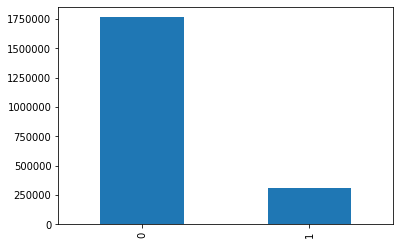

In [128]:
df_all['short_pause_before_play'].value_counts().sort_index().plot.bar()

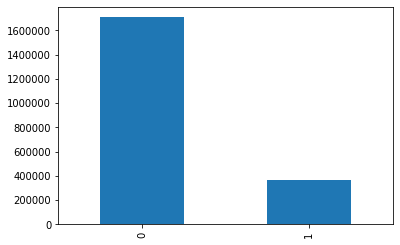

In [129]:
df_all['long_pause_before_play'].value_counts().sort_index().plot.bar()

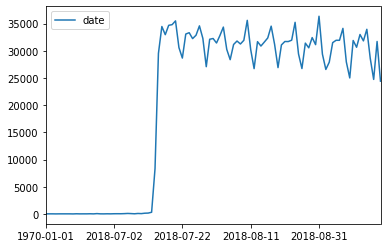

In [112]:
pd.DataFrame(df_all['date'].value_counts().sort_index()).plot()